In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mousedrug_data=pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_data=pd.read_csv(clinical_trial_data_to_load)

merged_data=pd.merge(mousedrug_data,clinicaltrial_data,on="Mouse ID")

merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [24]:
mean_data=merged_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_data=pd.DataFrame(mean_data)

mean_data.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [25]:
stderror_data=merged_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
                                                              
st_data = pd.DataFrame(stderror_data)


In [26]:
pivot_mean=mean_data.pivot_table(values="Tumor Volume (mm3)", index = "Timepoint", columns = "Drug")
pivot_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [27]:
pivot_stderr=st_data.pivot_table(values="Tumor Volume (mm3)", index = "Timepoint", columns = "Drug")
pivot_stderr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


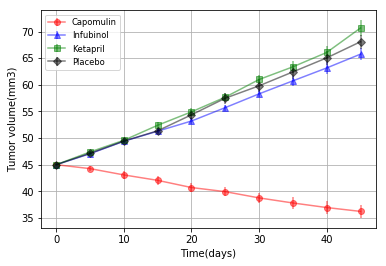

In [28]:



fig, ax = plt.subplots()
ax.errorbar(pivot_mean.index, pivot_mean["Capomulin"],pivot_stderr["Capomulin"],color="red", marker='o',alpha=0.5)
ax.errorbar(pivot_mean.index, pivot_mean["Infubinol"],pivot_stderr["Infubinol"],color="blue", marker='^',alpha=0.5)
ax.errorbar(pivot_mean.index, pivot_mean["Ketapril"],pivot_stderr["Ketapril"],color="green", marker='s',alpha=0.5)
ax.errorbar(pivot_mean.index, pivot_mean["Placebo"],pivot_stderr["Placebo"],color="black", marker='D',alpha=0.5)
ax.legend(loc="best", fontsize="small", fancybox=True)

ax.set_xlabel("Time(days)")
ax.set_ylabel("Tumor volume(mm3)")
ax.grid()

In [29]:
mean_m_data=merged_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
mean_meta_data=pd.DataFrame(mean_m_data)


In [30]:
st_meta_data=merged_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
                                                              
stderr_meta_data = pd.DataFrame(st_meta_data)


In [31]:
pivot_meta_mean=mean_meta_data.pivot_table(values="Metastatic Sites", index = "Timepoint", columns = "Drug")
pivot_meta_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [32]:
pivot_meta_stderr=stderr_meta_data.pivot_table(values="Metastatic Sites", index = "Timepoint", columns = "Drug")
pivot_meta_stderr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


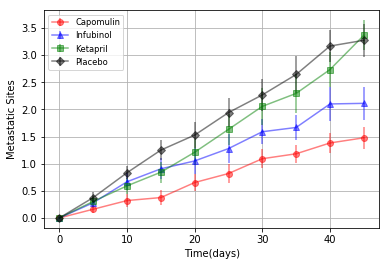

In [33]:
fig, ax = plt.subplots()
ax.errorbar(pivot_meta_mean.index, pivot_meta_mean["Capomulin"],pivot_meta_stderr["Capomulin"],color="red", marker='o',alpha=0.5)
ax.errorbar(pivot_meta_mean.index, pivot_meta_mean["Infubinol"],pivot_meta_stderr["Infubinol"],color="blue", marker='^',alpha=0.5)
ax.errorbar(pivot_meta_mean.index, pivot_meta_mean["Ketapril"],pivot_meta_stderr["Ketapril"],color="green", marker='s',alpha=0.5)
ax.errorbar(pivot_meta_mean.index, pivot_meta_mean["Placebo"],pivot_meta_stderr["Placebo"],color="black", marker='D',alpha=0.5)
ax.legend(loc="best", fontsize="small", fancybox=True)

ax.set_xlabel("Time(days)")
ax.set_ylabel("Metastatic Sites")
ax.grid()

In [34]:
mcnt_data=merged_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
mousecnt_data=pd.DataFrame(mcnt_data)
mousecnt_data.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [35]:
pivot_mousecnt=mousecnt_data.pivot_table(values="Mouse ID", index = "Timepoint", columns = "Drug")
mouse_cnt=(pivot_mousecnt[["Capomulin","Infubinol","Ketapril","Placebo"]]/25)*100
mouse_cnt

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


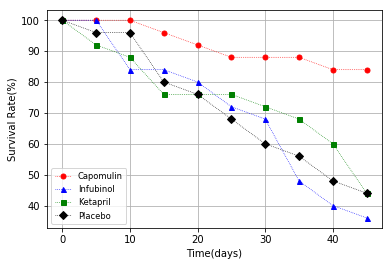

In [36]:
fig, ax = plt.subplots()

ax.errorbar(pivot_mousecnt.index,mouse_cnt["Capomulin"],color="red", marker='o',alpha=3,ls="dotted",lw=0.7,ms=5)
ax.errorbar(pivot_mousecnt.index,mouse_cnt["Infubinol"],color="blue", marker='^',alpha=3,ls="dotted",lw=0.7,ms=5)
ax.errorbar(pivot_mousecnt.index,mouse_cnt["Ketapril"],color="green", marker='s',alpha=3,ls="dotted",lw=0.7,ms=5)
ax.errorbar(pivot_mousecnt.index,mouse_cnt["Placebo"],color="black", marker='D',alpha=3,ls="dotted",lw=0.7,ms=5)
ax.legend(loc="best", fontsize="small", fancybox=True)

ax.set_xlabel("Time(days)")
ax.set_ylabel("Survival Rate(%)")
ax.grid()

In [37]:


percentage_change=(pivot_mean.iloc[-1,:] - pivot_mean.iloc[0,:])/pivot_mean.iloc[0,:]*100
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

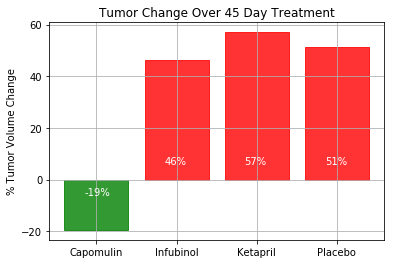

In [70]:
x_axis=percentage_change[["Capomulin","Infubinol","Ketapril","Placebo"]].index

y_axis=percentage_change[["Capomulin","Infubinol","Ketapril","Placebo"]]

y_labels = ['{:2.0f}%'.format(i) for i in y_axis]



def labels(x,y,z):
    bar1=plt.bar(x,y,alpha=0.8, align="center")
    for i, j in enumerate(y):
        text=0
        text = bar1[i].get_x()
        if(j < 0):
            b1=bar1[i].set_color('g')
            p1=plt.text(text+0.25,-6,z[i],color='w')
        else:
             b2=bar1[i].set_color('r')   
             p2=plt.text(text+0.25, 6,z[i],color='w')
    return(b1,p1,b2,p2)

    
    
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.yticks(np.arange(-20,80,20))
labels(x_axis,y_axis,y_labels)
plt.grid()